In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
train = df_train.copy()

# Q1. Does the Loan_status Depends on Education,Property Area and Dependents?

# Q2. Which gender's people are applying for more amount loan?

# Q3. Which type of customer's Credit_History is good? 

In [43]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,N,Y
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0,1


<p><b>Loan ID</b> -> As the name suggests each person should have a unique loan ID.</p>
<p><b>Gender</b> -> In general it is male or female. No offence for not including the third gender.</p>
<p><b>Married</b> -> Applicant who is married is represented by Y and not married is represented as N. The information regarding whether the applicant who is married is divorced or not has not been provided. So we don’t need to worry regarding all these.</p>
<p><b>Dependents</b> -> the number of people dependent on the applicant who has taken loan has been provided.</p>
<p><b>Education</b> -> It is either non -graduate or graduate. The assumption I can make is “ The probability of clearing the loan amount would be higher if the applicant is a graduate”.</p>
<p><b>Self_Employed</b> -> As the name suggests Self Employed means , he/she is employed for himself/herself only. So freelancer or having a own business might come in this category. An applicant who is self employed is represented by Y and the one who is not is represented by N.</p>
<p><b>Applicant Income</b> -> Applicant Income suggests the income by Applicant.So the general assumption that i can make would be “The one who earns more have a high probability of clearing loan amount and would be highly eligible for loan ”</p>
<p><b>Co Applicant income</b> -> this represents the income of co-applicant. I can also assume that “ If co applicant income is higher , the probability of being eligible would be higher “</p>
<p><b>Loan Amount</b> -> This amount represents the loan amount in thousands. One assumption I can make is that “ If Loan amount is higher , the probability of repaying would be lesser and vice versa”</p>
<p><b>Loan_Amount_Term</b> -> This represents the number of months required to repay the loan.</p>
<p><b>Credit_History</b> -> When I googled it , I got this information. A credit history is a record of a borrower’s responsible repayment of debts. It suggests → 1 denotes that the credit history is good and 0 otherwise.</p>
<p><b>Property_Area</b> -> The area where they belong to is my general assumption as nothing more is told. Here it can be three types. Urban or Semi Urban or Rural</p>
<p><b>Loan_Status</b> -> If the applicant is eligible for loan it’s yes represented by Y else it’s no represented by N.</p>

In [5]:
train.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [6]:
train.shape

(614, 13)

In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Q1. Does the Loan_status Depends on Education,Property Area and Dependents?

<h3>By analyzing we can see that there is no null value in Loan_Status and Education, So here we can directly visualize them</h3>

In [8]:
train = pd.concat([train,pd.get_dummies(train['Loan_Status'])],axis=1)

In [9]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,N,Y
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1


In [10]:
df_1_new = train[['Education','N','Y']]
df_2_new = train[['Property_Area','N','Y']]
df_3_new = train[['Dependents','N','Y']]

In [11]:
df_1_new.head()

,Education,N,Y
0,Graduate,0,1
1,Graduate,1,0
2,Graduate,0,1
3,Not Graduate,0,1
4,Graduate,0,1


In [12]:
df_2_new.head()

,Property_Area,N,Y
0,Urban,0,1
1,Rural,1,0
2,Urban,0,1
3,Urban,0,1
4,Urban,0,1


In [13]:
df_3_new.head()

,Dependents,N,Y
0,0,0,1
1,1,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [14]:
e = df_1_new.groupby(['Education','N','Y'])
e = e.size().unstack()
e

Y                   0      1
Education    N              
Graduate     0    NaN  340.0
             1  140.0    NaN
Not Graduate 0    NaN   82.0
             1   52.0    NaN

In [15]:
e.replace(np.nan,0,inplace=True)
e

Y                   0      1
Education    N              
Graduate     0    0.0  340.0
             1  140.0    0.0
Not Graduate 0    0.0   82.0
             1   52.0    0.0

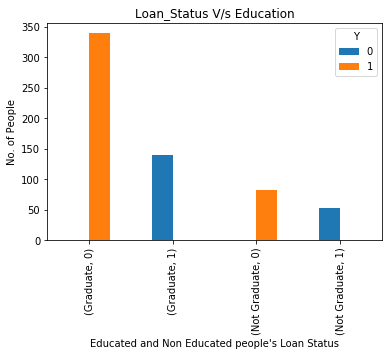

In [16]:
e.plot(kind='bar').plot()
plt.title('Loan_Status V/s Education')
plt.ylabel('No. of People')
plt.xlabel("Educated and Non Educated people's Loan Status")
plt.show()

<p>We can say that, If any person is graduated then their chance of getting loan is comparitively high than other</p>

In [17]:
p = df_2_new.groupby(['Property_Area','N','Y'])
p = p.size().unstack()
p

Y                   0      1
Property_Area N             
Rural         0   NaN  110.0
              1  69.0    NaN
Semiurban     0   NaN  179.0
              1  54.0    NaN
Urban         0   NaN  133.0
              1  69.0    NaN

Here NaN value is nothing but 0

In [18]:
p.replace(np.nan,0,inplace=True)
p

Y                   0      1
Property_Area N             
Rural         0   0.0  110.0
              1  69.0    0.0
Semiurban     0   0.0  179.0
              1  54.0    0.0
Urban         0   0.0  133.0
              1  69.0    0.0

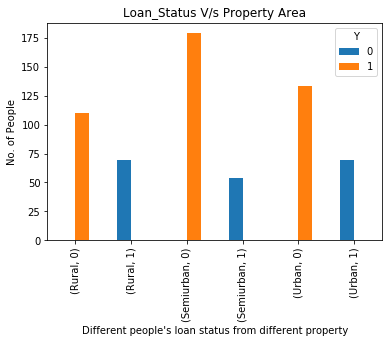

In [19]:
p.plot(kind='bar').plot()
plt.title('Loan_Status V/s Property Area')
plt.ylabel('No. of People')
plt.xlabel("Different people's loan status from different property")
plt.show()

Here we can see that the Loan acceptance is very high in Semiurban Area, and then urban area and at last rural areas

In [20]:
train['Dependents'].isnull().any()

True

Here the dependents column contains null value, so we need to remove that null value

In [21]:
miss_dep = (1 - (train['Dependents'].count()/train.shape[0]))*100
miss_dep

2.442996742671011

Here only 2.44% is null value, so we can either remove it or replace it by some value. It will be better if we remove those data

In [22]:
df_3_new.dropna(axis=0,inplace = True)

C:\Users\Anirban\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
d = df_3_new.groupby(['Dependents','N','Y'])
d = d.size().unstack()
d

Y                 0      1
Dependents N              
0          0    NaN  238.0
           1  107.0    NaN
1          0    NaN   66.0
           1   36.0    NaN
2          0    NaN   76.0
           1   25.0    NaN
3+         0    NaN   33.0
           1   18.0    NaN

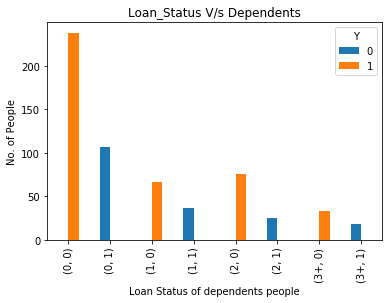

In [24]:
d.plot(kind='bar').plot()
plt.title('Loan_Status V/s Dependents')
plt.ylabel('No. of People')
plt.xlabel("Loan Status of dependents people")
plt.show()

Here, we can say that the loan rejection status is increasing while dependents is increasing

# Q2. Which gender's people are applying for more amount loan?

In [25]:
train['Gender'].isnull().any()

True

<h3>Now, For the gender we can see that there are missing values in the data set, so we have to fix it first</h3>

In [26]:
miss_gender = (1 - (train['Gender'].count()/train.shape[0]))*100
miss_gender

2.1172638436482094

Here we can see that, only 2.12% gender value is missing, So we can remove it or replace it by mode value because, the percentage of missing is very very less, So it will affect the overall model very less

In [27]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace=True)

In [28]:
print(train['Gender'].isnull().any())
print(train['LoanAmount'].isnull().any())

False
False


Now we can see that there is no missing value in Gender and Loan Amount column, so we can easily find the relationship between gender and loan

In [29]:
df_2 = train[['Gender','LoanAmount']]
df_2.head()

,Gender,LoanAmount
0,Male,146.412162
1,Male,128.000000
2,Male,66.000000
3,Male,120.000000
4,Male,141.000000


In [30]:
x = pd.DataFrame(df_2.groupby(['Gender'])['LoanAmount'].mean())
x

,LoanAmount
Gender,
Female,127.225326
Male,150.692891


[]

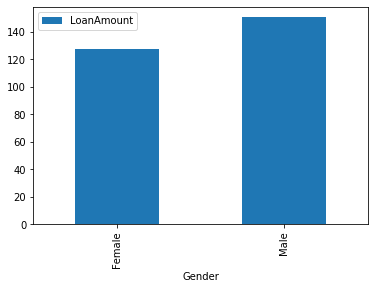

In [31]:
x.plot(kind='bar').plot()

So there is no major difference between average loan of Male and Female

# Q3. Which type of customer's Credit_History is good? 

In [32]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [33]:
train.count()

Loan_ID              614
Gender               614
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           614
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
N                    614
Y                    614
dtype: int64

Now we are going to analyze with credit history, but the credit history contains null value 

In [34]:
miss_cred_hist = (1 - (train['Credit_History'].count()/train.shape[0]))*100
miss_cred_hist

8.143322475570036

Here we can see that approx. 8.14% credit history value is missing. So we cannot delete those data because if we delete those values it may affect the model. So we are replacing the value the missing value by mode value

In [35]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [36]:
train['Credit_History'].isnull().any()

False

In [37]:
x = train[['Gender','Credit_History']]
x.head()

,Gender,Credit_History
0,Male,1.0
1,Male,1.0
2,Male,1.0
3,Male,1.0
4,Male,1.0


In [38]:
k_new = x.groupby(['Gender','Credit_History'])
k_dash = k_new.size().unstack()
k_dash

Credit_History,0.0,1.0
Gender,,
Female,17,95
Male,72,430


In [39]:
95/(17+95)

0.8482142857142857

In [40]:
430/(430+72)

0.8565737051792829

Female's Credited History is 84.82% and Male's Credited History is 85.65%

[]

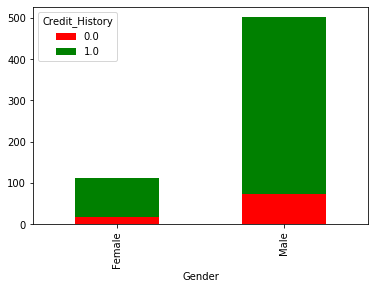

In [41]:
k_dash.plot(kind='bar',stacked='True',color=['red','green']).plot()

Here 0.0 = 'Not Credited' & 1.0 = 'Credited'

After analyzing we can say that the <b>Male</b> customer's credit history is comparatively good